In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error

In [2]:
flats = pd.read_csv('sg_resale_flats_2017.csv')

In [3]:
flats

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0
...,...,...,...,...,...,...,...,...,...,...,...
124311,2022-04,YISHUN,EXECUTIVE,351,YISHUN AVE 11,01 TO 03,154.0,Maisonette,1988,65 years 05 months,728888.0
124312,2022-04,YISHUN,EXECUTIVE,405,YISHUN AVE 6,04 TO 06,148.0,Maisonette,1988,65 years 05 months,753888.0
124313,2022-04,YISHUN,EXECUTIVE,326,YISHUN RING RD,10 TO 12,142.0,Apartment,1988,65 years 04 months,745000.0
124314,2022-04,YISHUN,EXECUTIVE,361,YISHUN RING RD,01 TO 03,146.0,Maisonette,1988,65 years 03 months,700000.0


In [4]:
# understand the overall dataset
# understand the features
# split into numeric and categorical features
# perform eda
# feature engineering/selection
# -> outliers, missing data, splitting the features, removing unwanted features
# -> one hot encoding for object features

In [5]:
flats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124316 entries, 0 to 124315
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                124316 non-null  object 
 1   town                 124316 non-null  object 
 2   flat_type            124316 non-null  object 
 3   block                124316 non-null  object 
 4   street_name          124316 non-null  object 
 5   storey_range         124316 non-null  object 
 6   floor_area_sqm       124316 non-null  float64
 7   flat_model           124316 non-null  object 
 8   lease_commence_date  124316 non-null  int64  
 9   remaining_lease      124316 non-null  object 
 10  resale_price         124316 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 10.4+ MB


In [6]:
# no null data present!! 

In [7]:
flats['town'].unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT PANJANG', 'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG',
       'CLEMENTI', 'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'PASIR RIS', 'PUNGGOL',
       'QUEENSTOWN', 'SEMBAWANG', 'SENGKANG', 'SERANGOON', 'TAMPINES',
       'TOA PAYOH', 'WOODLANDS', 'YISHUN'], dtype=object)

In [8]:
flats['street_name'].unique()

array(['ANG MO KIO AVE 10', 'ANG MO KIO AVE 4', 'ANG MO KIO AVE 5',
       'ANG MO KIO AVE 1', 'ANG MO KIO AVE 3', 'ANG MO KIO AVE 9',
       'ANG MO KIO AVE 8', 'ANG MO KIO AVE 6', 'ANG MO KIO ST 52',
       'BEDOK NTH AVE 4', 'BEDOK NTH AVE 1', 'BEDOK NTH RD',
       'BEDOK STH AVE 1', 'BEDOK RESERVOIR RD', 'CHAI CHEE ST',
       'BEDOK NTH ST 3', 'BEDOK STH RD', 'CHAI CHEE AVE',
       'NEW UPP CHANGI RD', 'CHAI CHEE DR', 'BEDOK STH AVE 2',
       'BEDOK NTH AVE 3', 'BEDOK RESERVOIR VIEW', 'CHAI CHEE RD',
       'LENGKONG TIGA', 'BEDOK CTRL', 'JLN DAMAI', 'BEDOK NTH AVE 2',
       'BEDOK STH AVE 3', 'SIN MING RD', 'SIN MING AVE', 'BISHAN ST 12',
       'BISHAN ST 13', 'BISHAN ST 22', 'BISHAN ST 24', 'BISHAN ST 23',
       'BRIGHT HILL DR', 'SHUNFU RD', 'BT BATOK ST 34', 'BT BATOK ST 51',
       'BT BATOK ST 11', 'BT BATOK ST 52', 'BT BATOK ST 21',
       'BT BATOK EAST AVE 5', 'BT BATOK WEST AVE 6', 'BT BATOK CTRL',
       'BT BATOK WEST AVE 8', 'BT BATOK EAST AVE 4', 'BT BATOK ST 3

In [9]:
# can consider dropping this column to do a more generalised analysis on the area instead

In [10]:
flats['storey_range'].unique()

array(['10 TO 12', '01 TO 03', '04 TO 06', '07 TO 09', '13 TO 15',
       '19 TO 21', '22 TO 24', '16 TO 18', '34 TO 36', '28 TO 30',
       '37 TO 39', '49 TO 51', '25 TO 27', '40 TO 42', '31 TO 33',
       '46 TO 48', '43 TO 45'], dtype=object)

In [11]:
# can consider grouping the storey range 

In [12]:
flats['flat_model'].unique()

array(['Improved', 'New Generation', 'DBSS', 'Standard', 'Apartment',
       'Simplified', 'Model A', 'Premium Apartment', 'Adjoined flat',
       'Model A-Maisonette', 'Maisonette', 'Type S1', 'Type S2',
       'Model A2', 'Terrace', 'Improved-Maisonette', 'Premium Maisonette',
       'Multi Generation', 'Premium Apartment Loft', '2-room'],
      dtype=object)

In [13]:
flats['flat_type'].unique()

array(['2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE', '1 ROOM',
       'MULTI-GENERATION'], dtype=object)

In [14]:
# the same flat type and model has approximately the same area size so i can drop flat type

In [15]:
# drop flat type, block, street name, lease commence date

In [16]:
drop_col = ['flat_type','block','street_name','lease_commence_date']
for col in drop_col:
    flats = flats.drop(col,axis=1)

In [17]:
flats

,month,town,storey_range,floor_area_sqm,flat_model,remaining_lease,resale_price
0,2017-01,ANG MO KIO,10 TO 12,44.0,Improved,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,01 TO 03,67.0,New Generation,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,01 TO 03,67.0,New Generation,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,04 TO 06,68.0,New Generation,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,01 TO 03,67.0,New Generation,62 years 05 months,265000.0
...,...,...,...,...,...,...,...
124311,2022-04,YISHUN,01 TO 03,154.0,Maisonette,65 years 05 months,728888.0
124312,2022-04,YISHUN,04 TO 06,148.0,Maisonette,65 years 05 months,753888.0
124313,2022-04,YISHUN,10 TO 12,142.0,Apartment,65 years 04 months,745000.0
124314,2022-04,YISHUN,01 TO 03,146.0,Maisonette,65 years 03 months,700000.0


### How does floor area affect the resale price? ###

From the scatterplot below, we can tell a higher floor area will command a higher resale price as as expected with almost no outliers. Each colour, which represent a certain flat model, is generally clustered together which suggests that each flat model could have a fixed floor area.

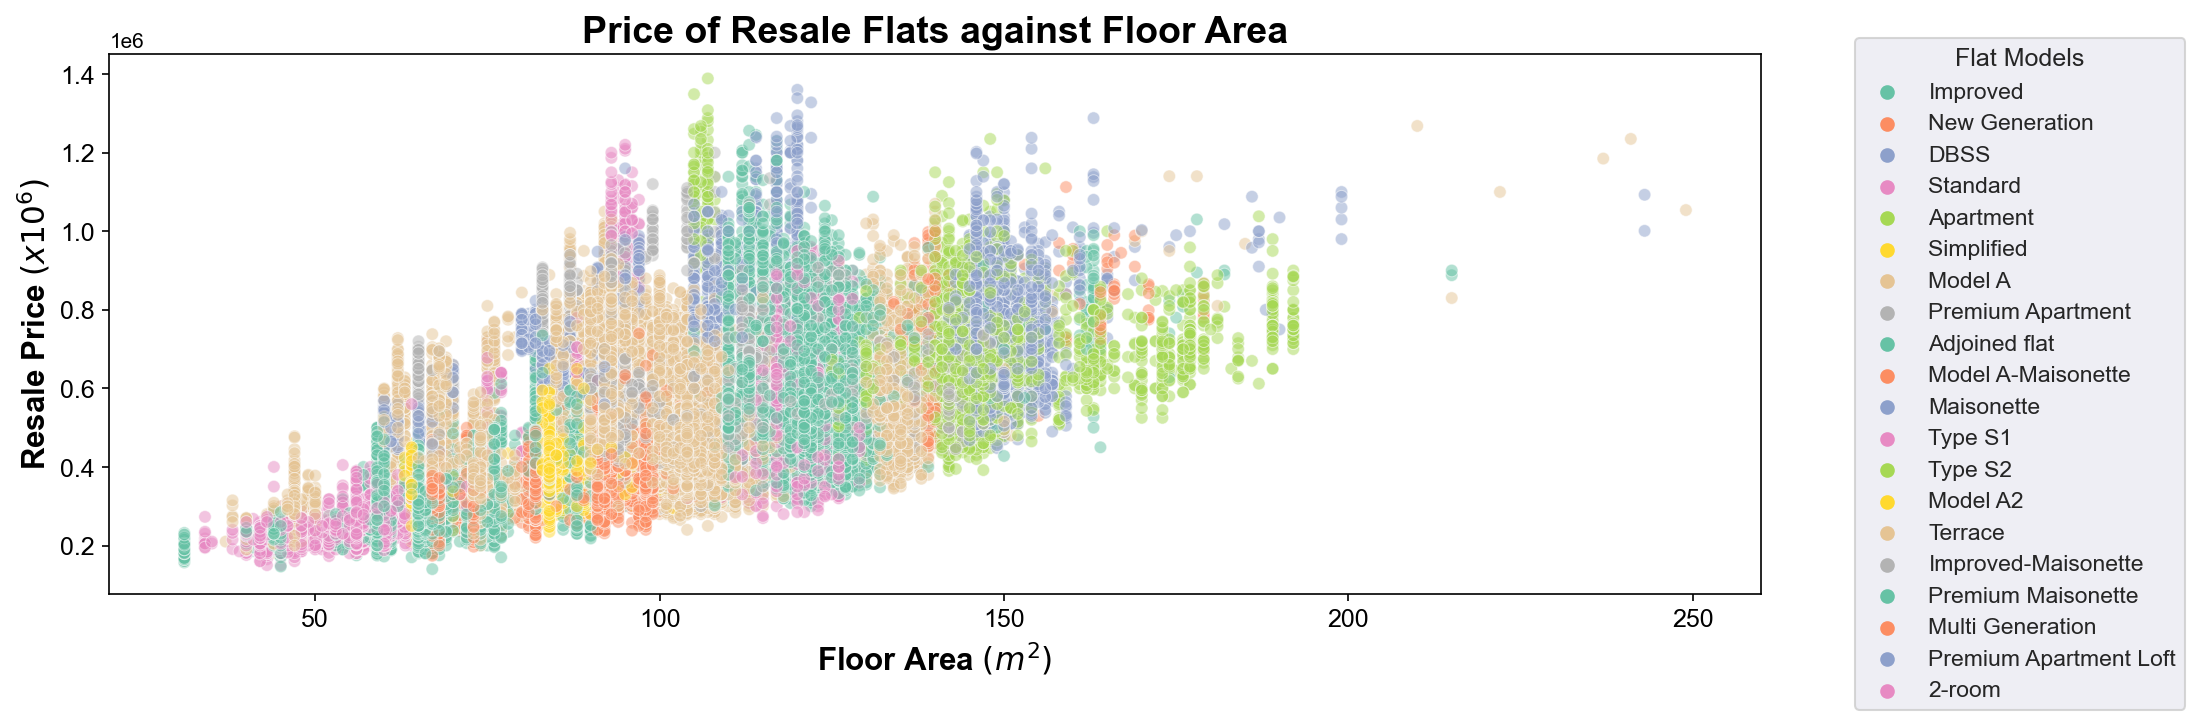

In [18]:
fig,ax = plt.subplots(figsize=(12,5),dpi=150)
sns.set(style='darkgrid')
sns.scatterplot(data=flats,x='floor_area_sqm',y='resale_price',
                              alpha=0.5,color='#D442F1',hue='flat_model',palette='Set2')
ax.set_ylabel(r"Resale Price $(x10^6)$",fontsize=15,fontweight='bold')
ax.set_xlabel(r"Floor Area $(m^2)$",fontsize=15,fontweight='bold')
ax.tick_params(axis='both',labelsize=12)
plt.title('Price of Resale Flats against Floor Area',fontweight='bold',fontsize=18,loc='center')
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.05, 1.05),loc=2,title='Flat Models')

### Which area has the highest mean resale flat price? ###
From the bar graph below, Bukit Timah has the highest mean resale flat price. Bukit Timah is known to be a rich estate with many expatriats staying and most properties there are luxury landed housings.

/var/folders/jq/3zk57sh96rj5fmr5m8znw03r0000gn/T/ipykernel_78681/4048114311.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([0,.1,.2,.3,.4,.5,.6,.7])


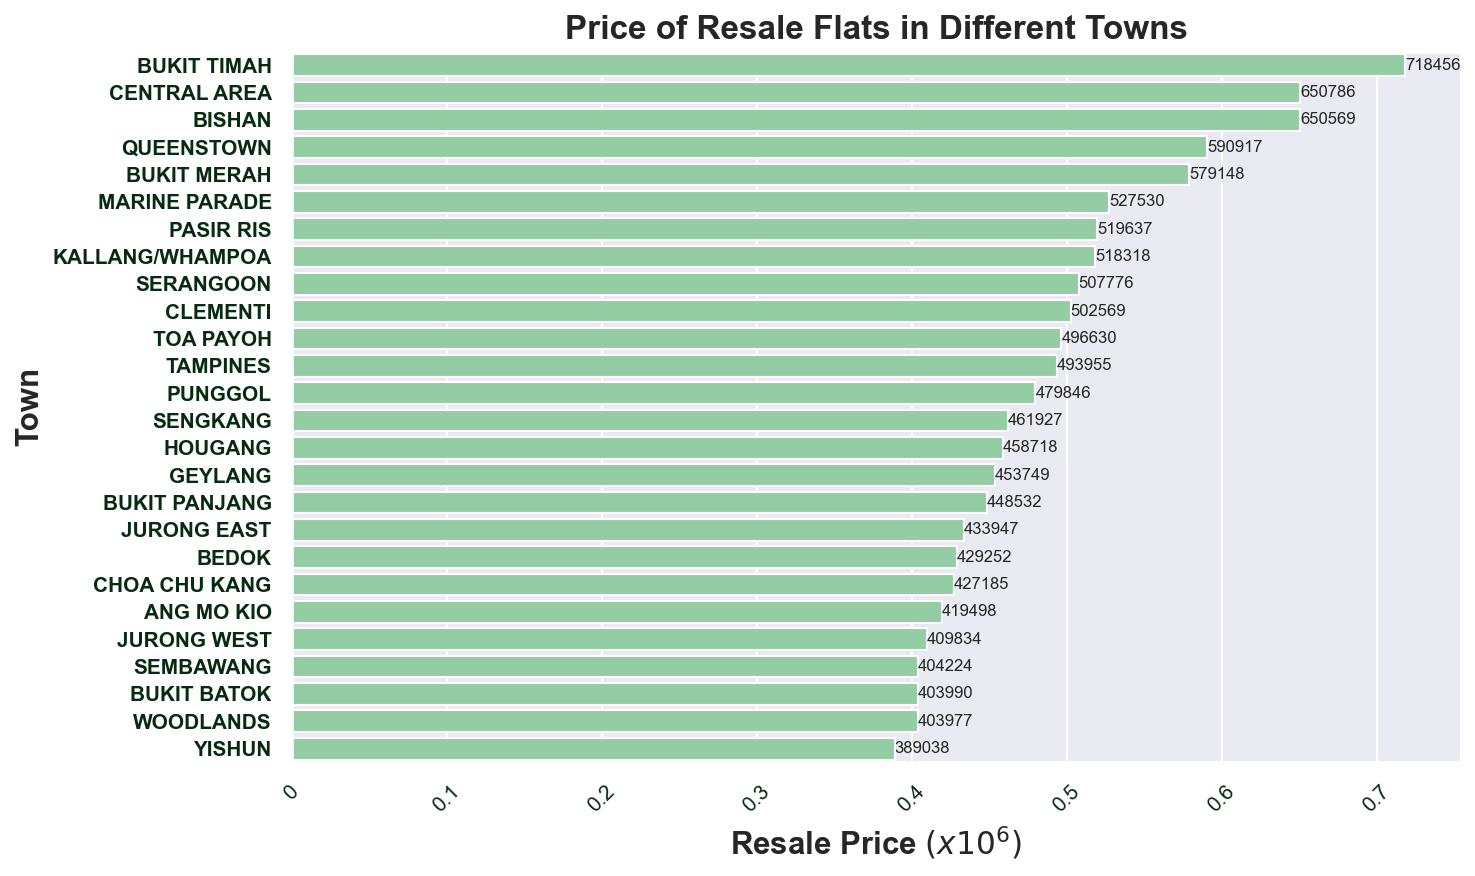

In [19]:
flats_sorted = flats.groupby('town',as_index=False).mean().sort_values('resale_price',ascending=False)

fig,ax = plt.subplots(figsize=(10,6),dpi=150)
sns.set(style='darkgrid')
sns.barplot(data=flats_sorted,y='town',x='resale_price',estimator=np.mean,ci=None,orient='h',color='#8bd6a0')
ax.bar_label(ax.containers[0],fontsize=8)
ax.set_xlabel(r"Resale Price $(x10^6)$",fontsize=15,fontweight='bold')
ax.set_ylabel(r"Town",fontsize=15,fontweight='bold')
ax.set_xticklabels([0,.1,.2,.3,.4,.5,.6,.7])
ax.tick_params(axis='both',labelsize=10,colors='#062b10')
plt.xticks(rotation=45)
plt.yticks(weight='bold')
plt.title('Price of Resale Flats in Different Towns',fontweight='bold',fontsize=16,loc='center')
plt.tight_layout()

In [20]:
flats['month_purchased'] = flats['month'].apply(lambda x:x[5:])
flats['year_purchased'] = flats['month'].apply(lambda x:x[:4])
flats = flats.drop('month',axis=1)

### Is there any significant change to the price of resale flats in each town from 2017 to 2022? ###
Generally, mean prices increases over the years for resale flats across all towns, with the highest increase in 2021. This could possibly be due to more people turning to the resale flat markets due to longer waiting time for BTO.

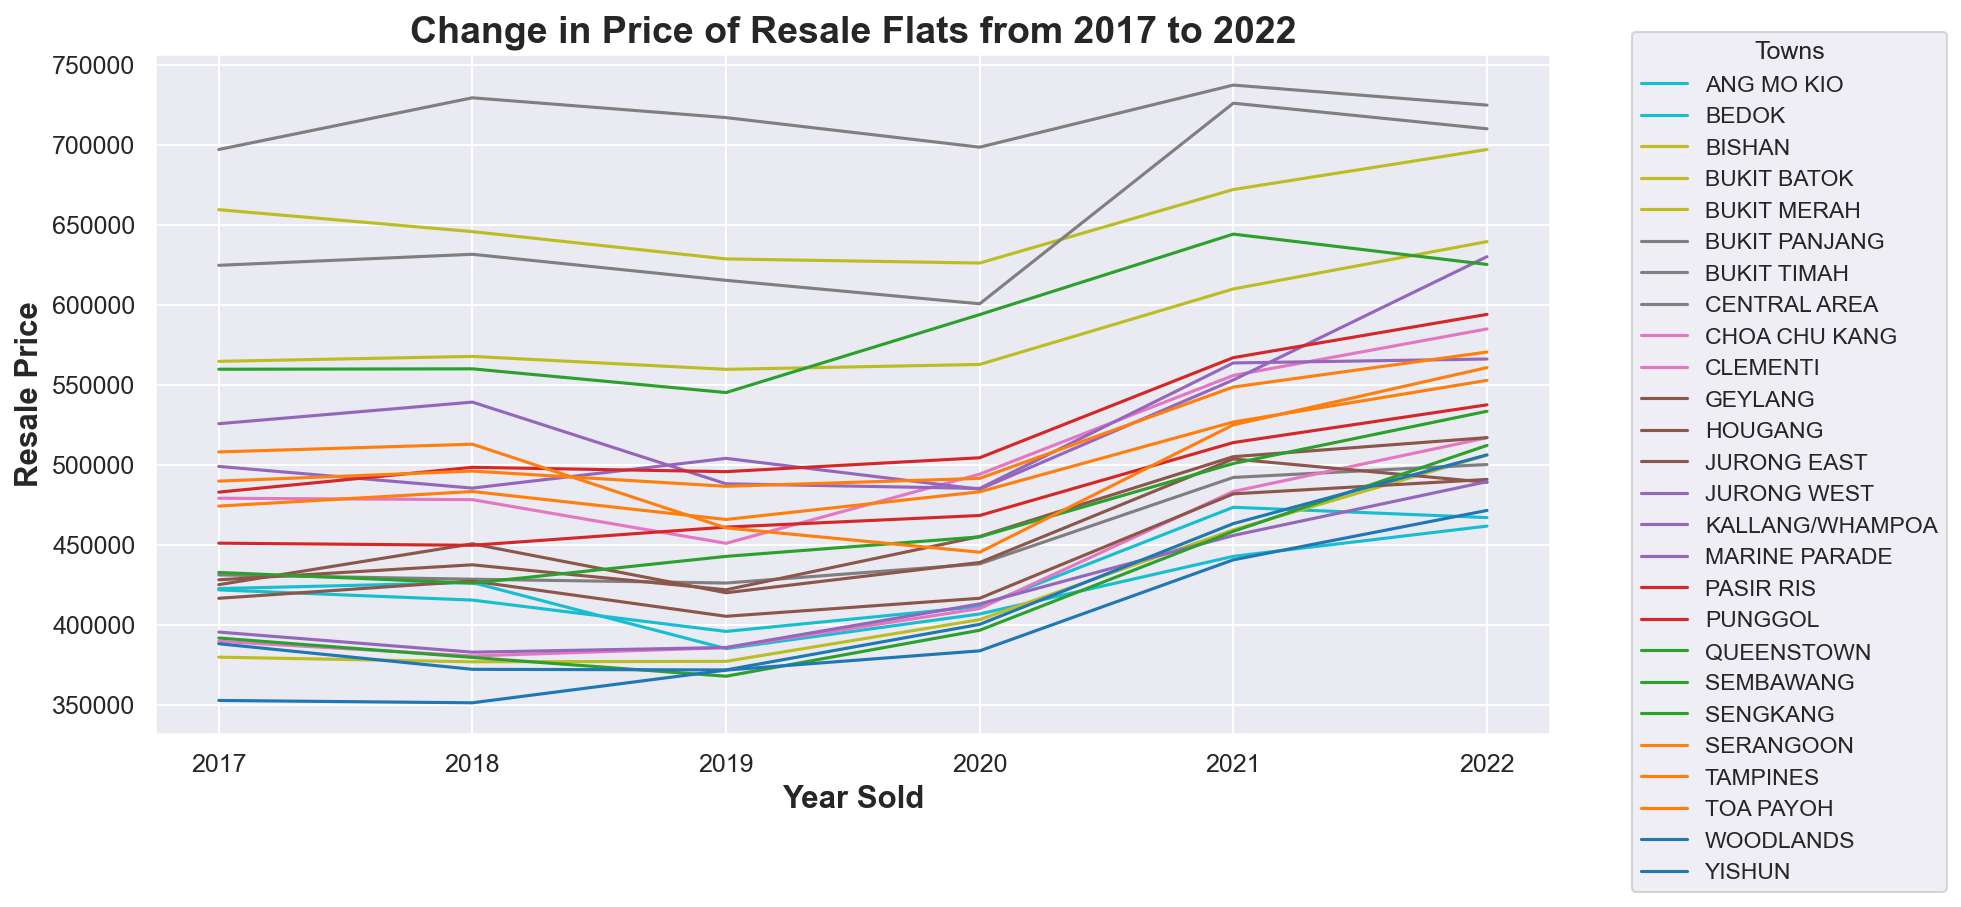

In [21]:
flats_sorted_by_year = flats.groupby(['year_purchased','town'],as_index=False).mean()

fig,ax = plt.subplots(figsize=(12,6),dpi=150)
sns.lineplot(data=flats_sorted_by_year,x='year_purchased',y='resale_price',hue='town',palette='tab10_r')
ax.set_ylabel(r"Resale Price",fontsize=15,fontweight='bold')
ax.set_xlabel(r"Year Sold",fontsize=15,fontweight='bold')
ax.tick_params(axis='both',labelsize=12)
plt.title('Change in Price of Resale Flats from 2017 to 2022',fontweight='bold',fontsize=18,loc='center')
#plt.tight_layout()
plt.legend(bbox_to_anchor=(1.05, 1.05),loc=2,title='Towns')

### Does Storey Affects the Price of Resale Flats? ###

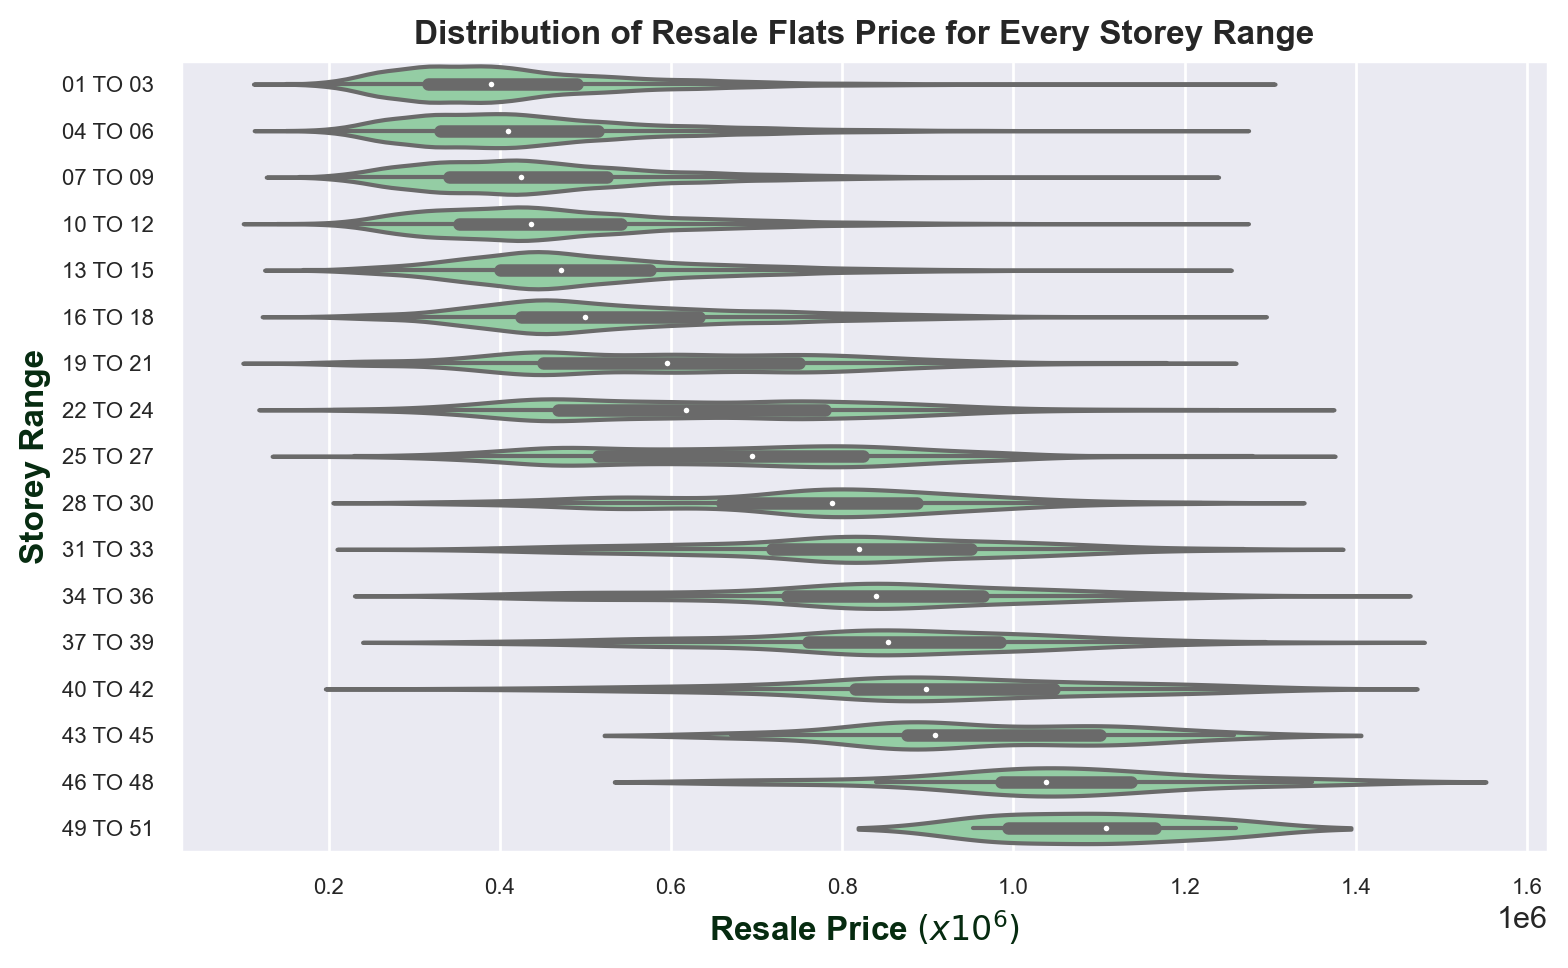

In [22]:
flats_sort_by_storey = flats.sort_values('storey_range')
fig,ax = plt.subplots(figsize=(8,5),dpi=200)
sns.violinplot(data=flats_sort_by_storey,x='resale_price',y='storey_range',orient='h',color='#8bd6a0')
ax.set_xlabel(r"Resale Price $(x10^6)$",fontsize=12,fontweight='bold',color='#062b10')
ax.set_ylabel(r"Storey Range",fontsize=12,fontweight='bold',color='#062b10')
ax.tick_params(axis='both',labelsize=8)
plt.title('Distribution of Resale Flats Price for Every Storey Range',fontweight='bold',fontsize=12,loc='center')
plt.tight_layout()

### Which storey is the most popular among resale flat buyers? ###
Storey 4 to 9 seem to be the most sold in the resale flat market. The average HDB in Singapore typically has 31-40 storeys and mostly those in the lower half storey range are transacted in the resale market. This could suggest that (1) those living on the higher floors are less proned to selling their units or (2) most buyers prefer lower storeys. The former seems more probable as higher floors are usually more popular and expensive.

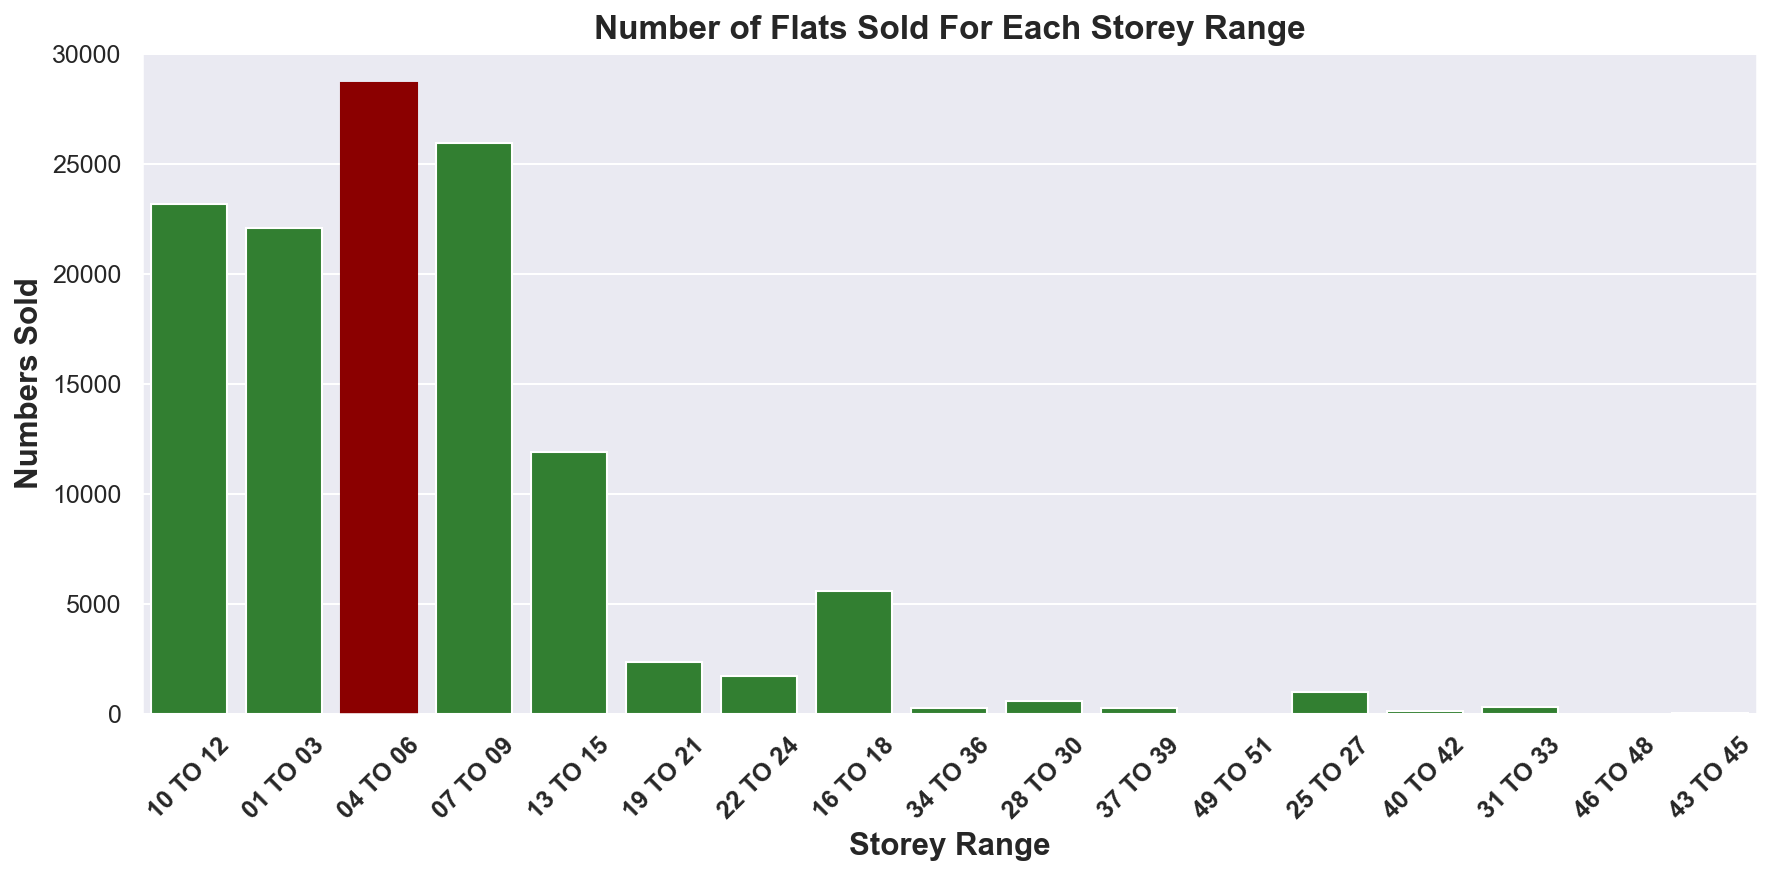

In [23]:
fig,ax = plt.subplots(figsize=(12,6),dpi=150)
sns.countplot(data=flats,x='storey_range',color='#268c24')
ax.patches[2].set_color('darkred')
ax.set_xlabel(r"Storey Range",fontsize=15,fontweight='bold')
ax.set_ylabel(r"Numbers Sold",fontsize=15,fontweight='bold')
ax.tick_params(axis='both',labelsize=12)
plt.xticks(rotation=45,weight='bold')
plt.title('Number of Flats Sold For Each Storey Range',fontweight='bold',fontsize=16,loc='center')
plt.tight_layout()

### Which Flat Model is The Most Costly? ###

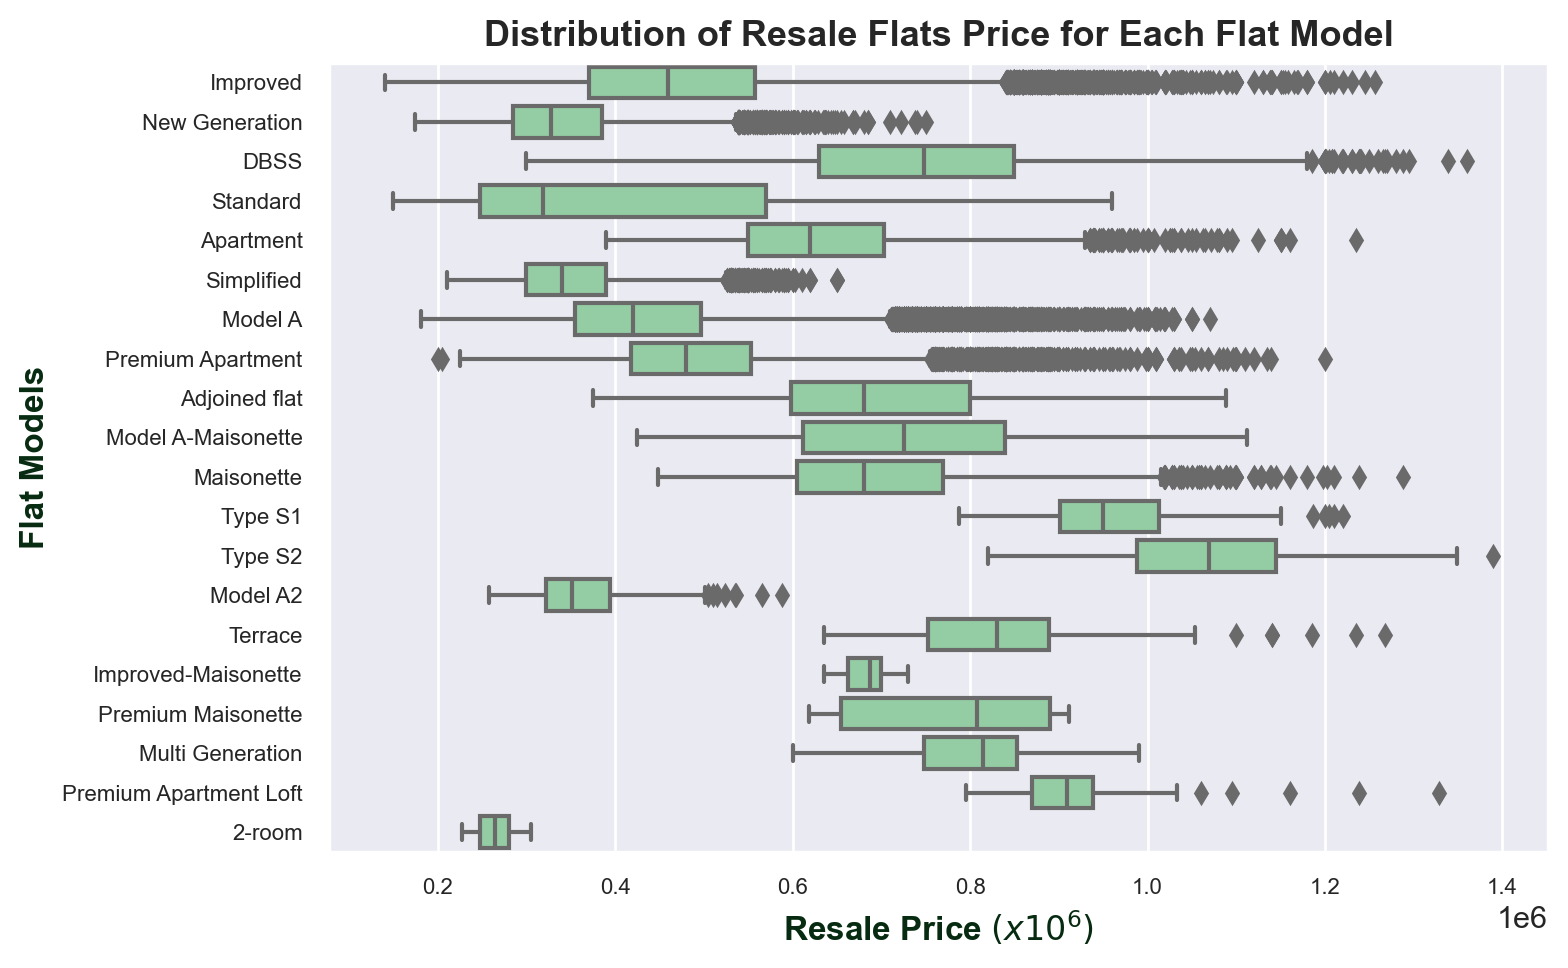

In [24]:
fig,ax = plt.subplots(figsize=(8,5),dpi=200)
sns.boxplot(data=flats,x='resale_price',y='flat_model',orient='h',color='#8bd6a0')
ax.set_xlabel(r"Resale Price $(x10^6)$",fontsize=12,fontweight='bold',color='#062b10')
ax.set_ylabel(r"Flat Models",fontsize=12,fontweight='bold',color='#062b10')
ax.tick_params(axis='both',labelsize=8)
plt.title('Distribution of Resale Flats Price for Each Flat Model',fontweight='bold',fontsize=13,loc='center')
plt.tight_layout()

### Which Flat Model is Sold The Most? ###

Model A and Improved models seem to be sold the most in the resale flat model possibly due to greater number of these flats being built in Singapore compared to Maisonette which are much rarer.

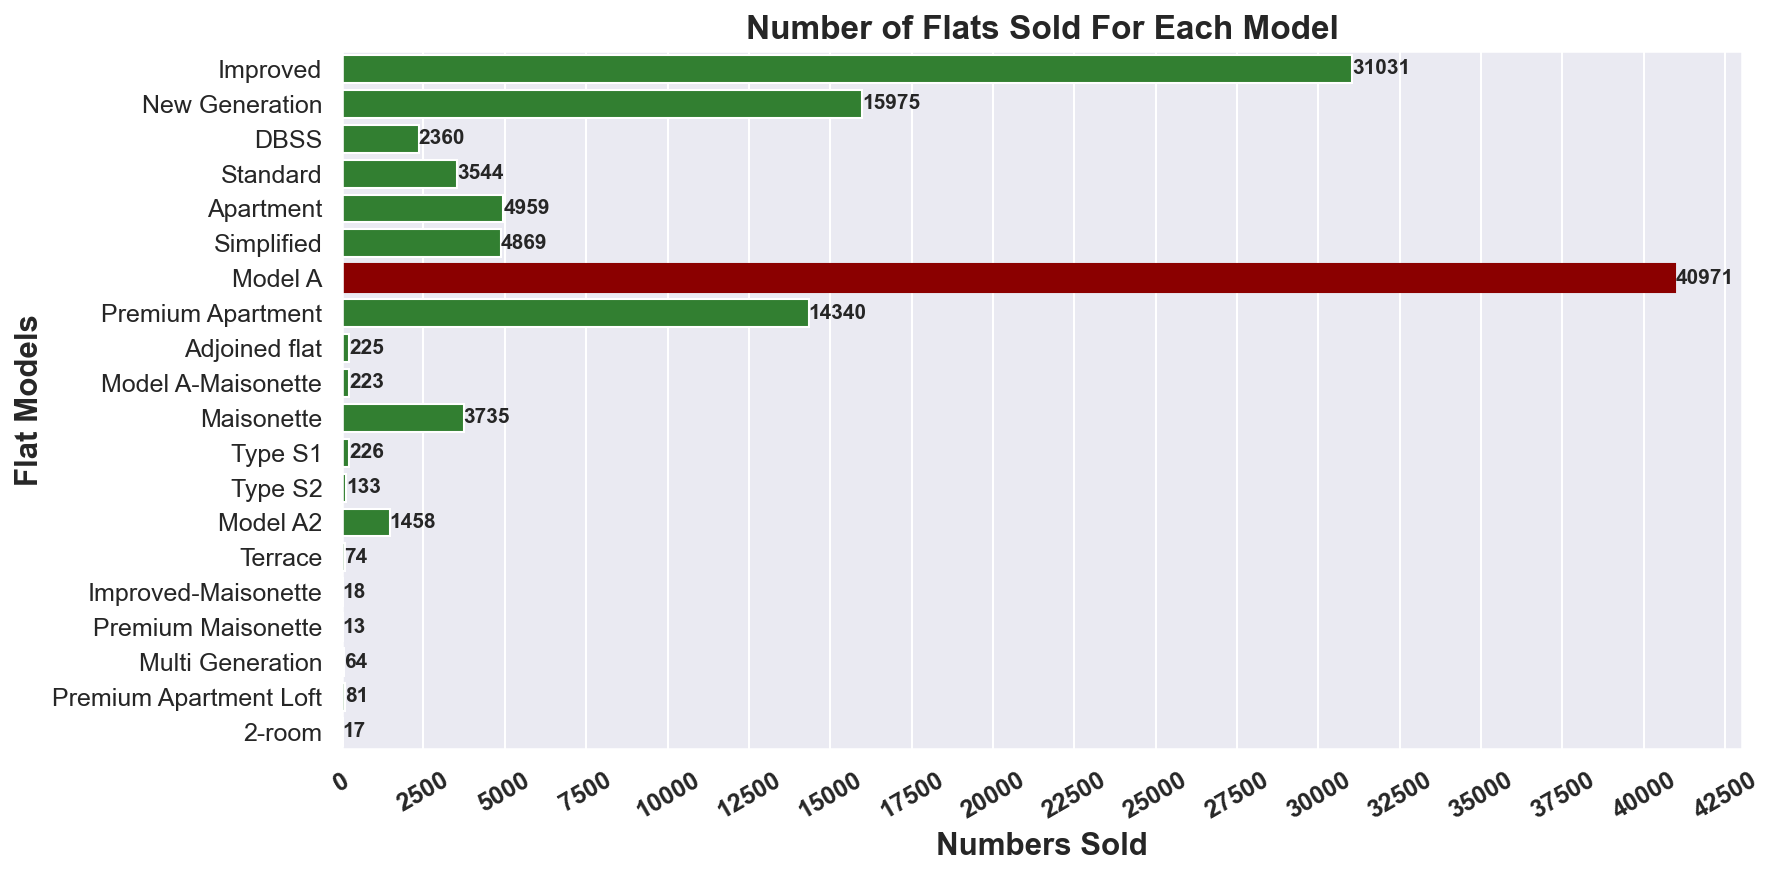

In [25]:
fig,ax = plt.subplots(figsize=(12,6),dpi=150)
sns.countplot(data=flats,y='flat_model',color='#268c24',orient='h')
ax.patches[6].set_color('darkred')
ax.bar_label(ax.containers[0],fontsize=10,weight='bold')
ax.set_xlabel(r"Numbers Sold",fontsize=15,fontweight='bold')
ax.set_ylabel(r"Flat Models",fontsize=15,fontweight='bold')
ax.set_xticks(np.linspace(0,42500,18))
ax.tick_params(axis='both',labelsize=12)
plt.xticks(rotation=30,weight='bold')
plt.title('Number of Flats Sold For Each Model',fontweight='bold',fontsize=16,loc='center')
plt.tight_layout()

### Distribution of Flats Sold Across Different Remainder Lease Period ###

In [26]:
def convert_years(x):
    splitted = x.split()
    if len(splitted) == 4:
        months = int(splitted[0])*12+int(splitted[2])
    else:
        months = int(splitted[0])*12
    return months

flats['remaining_lease'] = flats['remaining_lease'].apply(convert_years)

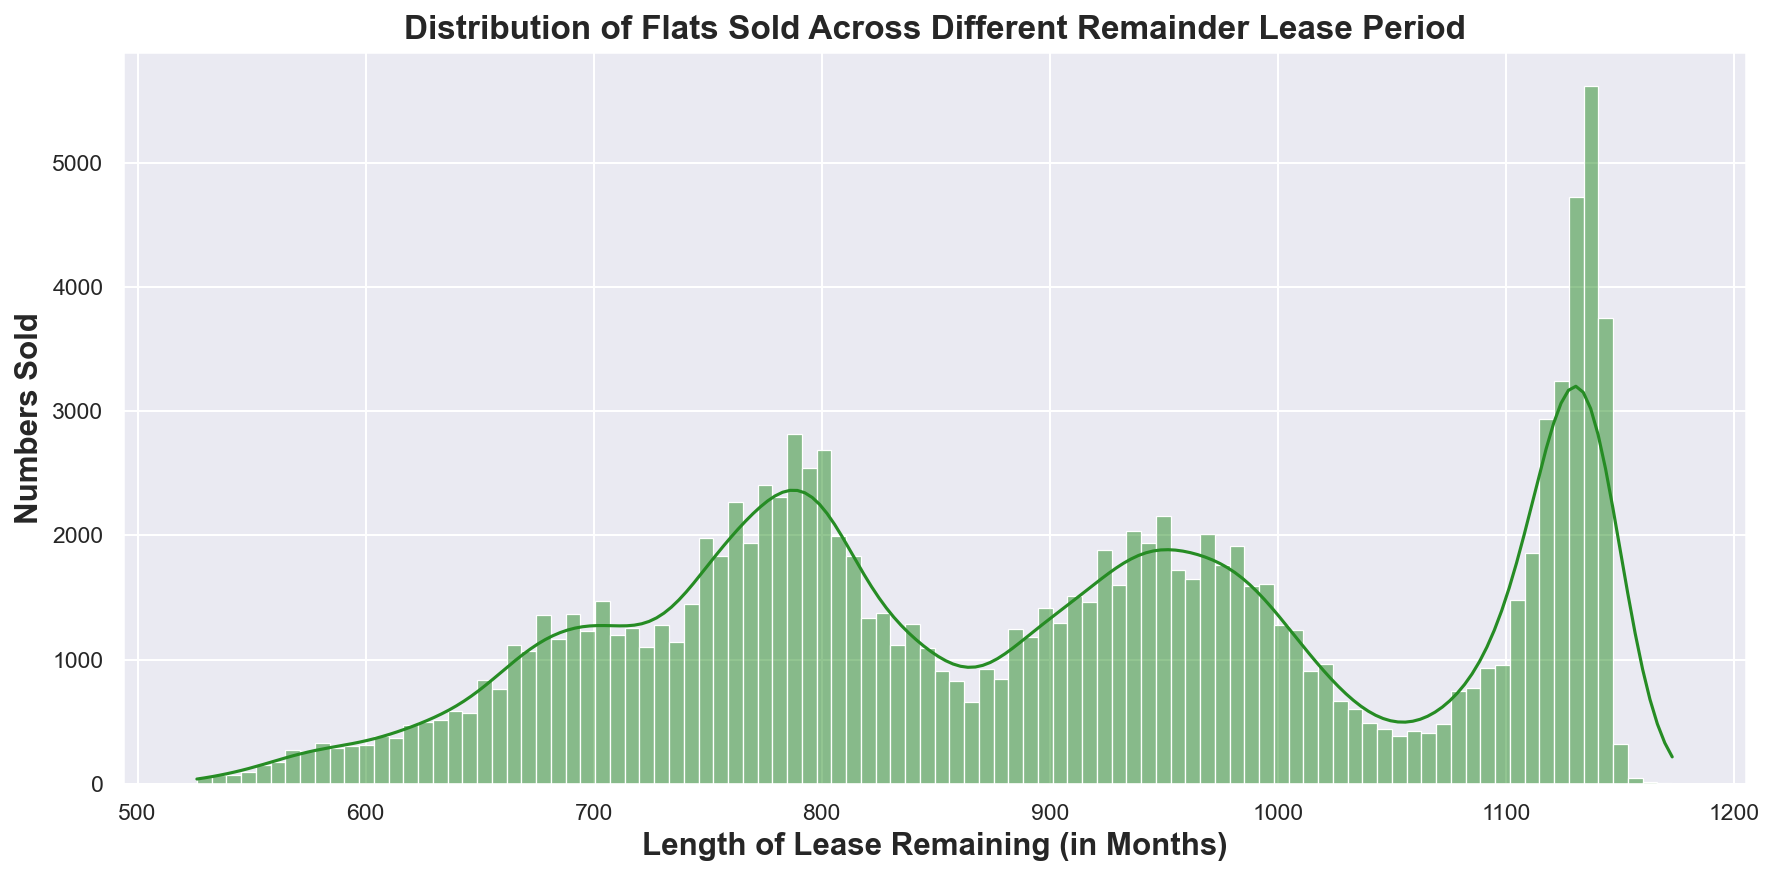

In [27]:
fig,ax = plt.subplots(figsize=(12,6),dpi=150)
hist = sns.histplot(data=flats,x='remaining_lease',color='#268c24',bins=100,kde=True)
ax.set_xlabel(r"Length of Lease Remaining (in Months)",fontsize=15,fontweight='bold')
ax.set_ylabel(r"Numbers Sold",fontsize=15,fontweight='bold')
plt.title('Distribution of Flats Sold Across Different Remainder Lease Period',
          fontweight='bold',fontsize=16,loc='center')
plt.tight_layout()

### How Length of Remainder Lease Period Affects Resale Price ###
The length of lease remaining does not seem to play a very significant role in determining the resale price compared to other factors such as sqm of the flat.

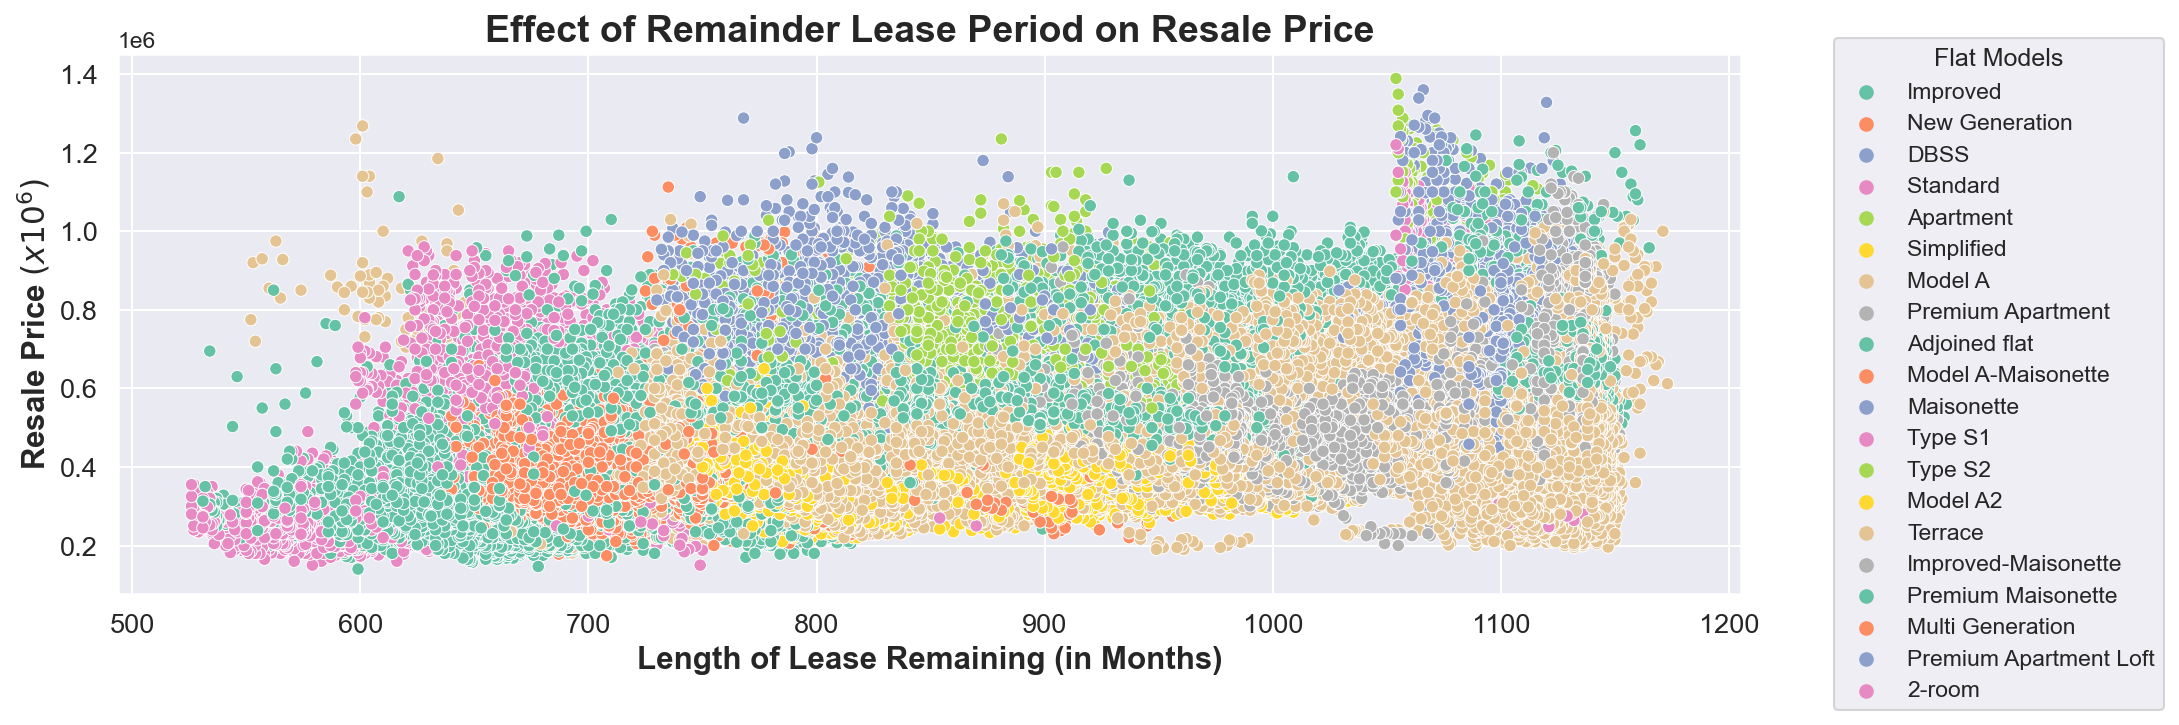

In [28]:
fig,ax = plt.subplots(figsize=(12,5),dpi=150)
sns.scatterplot(data=flats,y='resale_price',x='remaining_lease',hue='flat_model',palette='Set2')
ax.set_xlabel(r"Length of Lease Remaining (in Months)",fontsize=15,fontweight='bold')
ax.set_ylabel(r"Resale Price $(x10^6)$",fontsize=15,fontweight='bold')
ax.tick_params(axis='both',labelsize=13)
plt.title('Effect of Remainder Lease Period on Resale Price',fontweight='bold',fontsize=18,loc='center')
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.05, 1.05),loc=2,title='Flat Models')

## Feature Engineering ##

In [29]:
flats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124316 entries, 0 to 124315
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   town             124316 non-null  object 
 1   storey_range     124316 non-null  object 
 2   floor_area_sqm   124316 non-null  float64
 3   flat_model       124316 non-null  object 
 4   remaining_lease  124316 non-null  int64  
 5   resale_price     124316 non-null  float64
 6   month_purchased  124316 non-null  object 
 7   year_purchased   124316 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 7.6+ MB


In [30]:
objs = flats.select_dtypes(include='object')
nums = flats.select_dtypes(exclude='object')

In [31]:
objs = pd.get_dummies(objs,drop_first=True)

In [32]:
flats_ml = pd.concat([nums,objs],axis=1)

In [33]:
flats_ml.isnull().sum()

floor_area_sqm         0
remaining_lease        0
resale_price           0
town_BEDOK             0
town_BISHAN            0
                      ..
year_purchased_2018    0
year_purchased_2019    0
year_purchased_2020    0
year_purchased_2021    0
year_purchased_2022    0
Length: 79, dtype: int64

## Machine Learning with Regression ##

In [34]:
# split dataset into X and y
# split into train and test set
# scale X train and train set
# create elastic net model and find the best parameters
# put X train in the model and eval result
# retrain model and eval again
# put X test and predict result

In [35]:
X = flats_ml.drop('resale_price',axis=1)
y = flats_ml['resale_price']

In [36]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [37]:
scaler = StandardScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [39]:
elastic_model = ElasticNet()
grid_param = {'alpha':[0.1,0.5,1,3,5,10,50,100],'l1_ratio':[0.1,0.5,0.6,0.7,0.8,0.9,1]}
grid_model = GridSearchCV(estimator=elastic_model,param_grid=grid_param,scoring='neg_mean_squared_error',cv=5,verbose=3)
grid_model.fit(scaled_X_train,y_train)

Fitting 5 folds for each of 56 candidates, totalling 280 fits
[CV 1/5] END .alpha=0.1, l1_ratio=0.1;, score=-3685804983.512 total time=   0.7s
[CV 2/5] END .alpha=0.1, l1_ratio=0.1;, score=-3617936563.107 total time=   0.4s
[CV 3/5] END .alpha=0.1, l1_ratio=0.1;, score=-3612101731.991 total time=   0.4s
[CV 4/5] END .alpha=0.1, l1_ratio=0.1;, score=-3689961463.994 total time=   0.4s
[CV 5/5] END .alpha=0.1, l1_ratio=0.1;, score=-3651126926.510 total time=   0.4s
[CV 1/5] END .alpha=0.1, l1_ratio=0.5;, score=-3463661140.485 total time=   0.6s
[CV 2/5] END .alpha=0.1, l1_ratio=0.5;, score=-3413932599.580 total time=   0.7s
[CV 3/5] END .alpha=0.1, l1_ratio=0.5;, score=-3403744306.197 total time=   0.6s
[CV 4/5] END .alpha=0.1, l1_ratio=0.5;, score=-3473347255.728 total time=   0.6s
[CV 5/5] END .alpha=0.1, l1_ratio=0.5;, score=-3443690529.493 total time=   0.6s
[CV 1/5] END .alpha=0.1, l1_ratio=0.6;, score=-3414936965.030 total time=   0.6s
[CV 2/5] END .alpha=0.1, l1_ratio=0.6;, score=-

/Users/hengboonlong/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 108562853516838.62, tolerance: 178930149069.31595
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END ...alpha=0.1, l1_ratio=1;, score=-3278682244.804 total time=   5.2s


/Users/hengboonlong/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 106863327375793.6, tolerance: 179283902441.6229
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END ...alpha=0.1, l1_ratio=1;, score=-3265234674.539 total time=   5.6s


/Users/hengboonlong/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 109303481903833.66, tolerance: 179614440591.6868
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END ...alpha=0.1, l1_ratio=1;, score=-3247896233.323 total time=   5.7s


/Users/hengboonlong/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 107432780840388.8, tolerance: 178891315575.79968
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END ...alpha=0.1, l1_ratio=1;, score=-3314439100.315 total time=   5.8s


/Users/hengboonlong/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 105405795176405.0, tolerance: 178925998492.3208
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END ...alpha=0.1, l1_ratio=1;, score=-3283924469.599 total time=   6.5s
[CV 1/5] END .alpha=0.5, l1_ratio=0.1;, score=-5994246817.668 total time=   0.3s
[CV 2/5] END .alpha=0.5, l1_ratio=0.1;, score=-5846455117.975 total time=   0.1s
[CV 3/5] END .alpha=0.5, l1_ratio=0.1;, score=-5837524892.970 total time=   0.2s
[CV 4/5] END .alpha=0.5, l1_ratio=0.1;, score=-6004910319.407 total time=   0.2s
[CV 5/5] END .alpha=0.5, l1_ratio=0.1;, score=-5885171382.953 total time=   0.2s
[CV 1/5] END .alpha=0.5, l1_ratio=0.5;, score=-4724915126.768 total time=   0.2s
[CV 2/5] END .alpha=0.5, l1_ratio=0.5;, score=-4611569505.960 total time=   0.2s
[CV 3/5] END .alpha=0.5, l1_ratio=0.5;, score=-4608646450.965 total time=   0.2s
[CV 4/5] END .alpha=0.5, l1_ratio=0.5;, score=-4729955214.399 total time=   0.2s
[CV 5/5] END .alpha=0.5, l1_ratio=0.5;, score=-4647865247.074 total time=   0.2s
[CV 1/5] END .alpha=0.5, l1_ratio=0.6;, score=-4393489646.563 total time=   0.2s
[CV 2/5] END .alpha=0.5, l1_

/Users/hengboonlong/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 87871493832203.08, tolerance: 178930149069.31595
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END ...alpha=0.5, l1_ratio=1;, score=-3278691008.524 total time=   6.2s


/Users/hengboonlong/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 72968443375137.0, tolerance: 179283902441.6229
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END ...alpha=0.5, l1_ratio=1;, score=-3265236110.094 total time=   5.7s


/Users/hengboonlong/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 90387389537297.48, tolerance: 179614440591.6868
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END ...alpha=0.5, l1_ratio=1;, score=-3247891853.559 total time=   6.1s


/Users/hengboonlong/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 79185013615073.03, tolerance: 178891315575.79968
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END ...alpha=0.5, l1_ratio=1;, score=-3314445261.638 total time=   6.0s


/Users/hengboonlong/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 63048191271398.67, tolerance: 178925998492.3208
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END ...alpha=0.5, l1_ratio=1;, score=-3283935748.489 total time=   5.9s
[CV 1/5] END ...alpha=1, l1_ratio=0.1;, score=-8407028651.239 total time=   0.2s
[CV 2/5] END ...alpha=1, l1_ratio=0.1;, score=-8218038943.602 total time=   0.1s
[CV 3/5] END ...alpha=1, l1_ratio=0.1;, score=-8190136450.637 total time=   0.1s
[CV 4/5] END ...alpha=1, l1_ratio=0.1;, score=-8423872385.768 total time=   0.1s
[CV 5/5] END ...alpha=1, l1_ratio=0.1;, score=-8269030234.843 total time=   0.2s
[CV 1/5] END ...alpha=1, l1_ratio=0.5;, score=-6292444495.771 total time=   0.1s
[CV 2/5] END ...alpha=1, l1_ratio=0.5;, score=-6138125996.855 total time=   0.2s
[CV 3/5] END ...alpha=1, l1_ratio=0.5;, score=-6127225018.788 total time=   0.2s
[CV 4/5] END ...alpha=1, l1_ratio=0.5;, score=-6304173454.352 total time=   0.1s
[CV 5/5] END ...alpha=1, l1_ratio=0.5;, score=-6177821192.693 total time=   0.1s
[CV 1/5] END ...alpha=1, l1_ratio=0.6;, score=-5688318935.360 total time=   0.2s
[CV 2/5] END ...alpha=1, l1_

/Users/hengboonlong/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 62404736936486.38, tolerance: 178930149069.31595
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END .....alpha=1, l1_ratio=1;, score=-3278701944.993 total time=   5.8s


/Users/hengboonlong/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 36470083560957.81, tolerance: 179283902441.6229
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END .....alpha=1, l1_ratio=1;, score=-3265237771.742 total time=   6.3s


/Users/hengboonlong/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 66740138424578.71, tolerance: 179614440591.6868
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END .....alpha=1, l1_ratio=1;, score=-3247887287.748 total time=   7.5s


/Users/hengboonlong/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 42417969633786.81, tolerance: 178891315575.79968
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END .....alpha=1, l1_ratio=1;, score=-3314453080.669 total time=   5.6s


/Users/hengboonlong/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 31938046098811.344, tolerance: 178925998492.3208
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END .....alpha=1, l1_ratio=1;, score=-3283949904.420 total time=   5.4s
[CV 1/5] END ..alpha=3, l1_ratio=0.1;, score=-14197055562.687 total time=   0.1s
[CV 2/5] END ..alpha=3, l1_ratio=0.1;, score=-13975074951.883 total time=   0.1s
[CV 3/5] END ..alpha=3, l1_ratio=0.1;, score=-13890881776.602 total time=   0.1s
[CV 4/5] END ..alpha=3, l1_ratio=0.1;, score=-14219461720.796 total time=   0.1s
[CV 5/5] END ..alpha=3, l1_ratio=0.1;, score=-14076236140.913 total time=   0.1s
[CV 1/5] END ..alpha=3, l1_ratio=0.5;, score=-10868819832.953 total time=   0.1s
[CV 2/5] END ..alpha=3, l1_ratio=0.5;, score=-10657913957.988 total time=   0.1s
[CV 3/5] END ..alpha=3, l1_ratio=0.5;, score=-10606747019.418 total time=   0.1s
[CV 4/5] END ..alpha=3, l1_ratio=0.5;, score=-10888765902.252 total time=   0.1s
[CV 5/5] END ..alpha=3, l1_ratio=0.5;, score=-10728344241.848 total time=   0.1s
[CV 1/5] END ...alpha=3, l1_ratio=0.6;, score=-9728022174.586 total time=   0.1s
[CV 2/5] END ...alpha=3, l1_

/Users/hengboonlong/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9166237579656.406, tolerance: 178930149069.31595
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END .....alpha=3, l1_ratio=1;, score=-3278745716.871 total time=   7.5s


/Users/hengboonlong/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5831506783490.969, tolerance: 179283902441.6229
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END .....alpha=3, l1_ratio=1;, score=-3265241023.843 total time=   5.3s


/Users/hengboonlong/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10435089824187.562, tolerance: 179614440591.6868
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END .....alpha=3, l1_ratio=1;, score=-3247877061.044 total time=   7.4s


/Users/hengboonlong/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5377425787259.469, tolerance: 178891315575.79968
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END .....alpha=3, l1_ratio=1;, score=-3314484109.490 total time=   5.3s


/Users/hengboonlong/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2491025055476.9062, tolerance: 178925998492.3208
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END .....alpha=3, l1_ratio=1;, score=-3284013109.623 total time=   5.2s
[CV 1/5] END ..alpha=5, l1_ratio=0.1;, score=-17127388198.728 total time=   0.1s
[CV 2/5] END ..alpha=5, l1_ratio=0.1;, score=-16905447834.289 total time=   0.1s
[CV 3/5] END ..alpha=5, l1_ratio=0.1;, score=-16792546559.509 total time=   0.1s
[CV 4/5] END ..alpha=5, l1_ratio=0.1;, score=-17151089435.231 total time=   0.1s
[CV 5/5] END ..alpha=5, l1_ratio=0.1;, score=-17034510797.437 total time=   0.1s
[CV 1/5] END ..alpha=5, l1_ratio=0.5;, score=-13747755099.527 total time=   0.1s
[CV 2/5] END ..alpha=5, l1_ratio=0.5;, score=-13526436859.892 total time=   0.1s
[CV 3/5] END ..alpha=5, l1_ratio=0.5;, score=-13446668187.908 total time=   0.2s
[CV 4/5] END ..alpha=5, l1_ratio=0.5;, score=-13769889032.255 total time=   0.1s
[CV 5/5] END ..alpha=5, l1_ratio=0.5;, score=-13623310885.875 total time=   0.1s
[CV 1/5] END ..alpha=5, l1_ratio=0.6;, score=-12458096603.432 total time=   0.1s
[CV 2/5] END ..alpha=5, l1_r

/Users/hengboonlong/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3009057438063.6562, tolerance: 178930149069.31595
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END .....alpha=5, l1_ratio=1;, score=-3278788523.434 total time=   5.9s


/Users/hengboonlong/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 508242255929.46875, tolerance: 179283902441.6229
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END .....alpha=5, l1_ratio=1;, score=-3265251233.745 total time=   8.4s


/Users/hengboonlong/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1020078209078.125, tolerance: 179614440591.6868
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END .....alpha=5, l1_ratio=1;, score=-3247872655.798 total time=   5.5s


/Users/hengboonlong/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1247771375836.4062, tolerance: 178891315575.79968
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END .....alpha=5, l1_ratio=1;, score=-3314514953.278 total time=   5.4s
[CV 5/5] END .....alpha=5, l1_ratio=1;, score=-3284072701.508 total time=   1.4s
[CV 1/5] END .alpha=10, l1_ratio=0.1;, score=-20502575835.976 total time=   0.1s
[CV 2/5] END .alpha=10, l1_ratio=0.1;, score=-20286340595.795 total time=   0.1s
[CV 3/5] END .alpha=10, l1_ratio=0.1;, score=-20141889259.431 total time=   0.1s
[CV 4/5] END .alpha=10, l1_ratio=0.1;, score=-20526898752.318 total time=   0.1s
[CV 5/5] END .alpha=10, l1_ratio=0.1;, score=-20446611175.280 total time=   0.1s
[CV 1/5] END .alpha=10, l1_ratio=0.5;, score=-17699342130.407 total time=   0.1s
[CV 2/5] END .alpha=10, l1_ratio=0.5;, score=-17478081209.187 total time=   0.1s
[CV 3/5] END .alpha=10, l1_ratio=0.5;, score=-17359653524.174 total time=   0.1s
[CV 4/5] END .alpha=10, l1_ratio=0.5;, score=-17723197404.345 total time=   0.1s
[CV 5/5] END .alpha=10, l1_ratio=0.5;, score=-17612510286.099 total time=   0.1s
[CV 1/5] END .alpha=10, l1_r

/Users/hengboonlong/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 134729667989804.5, tolerance: 223911824871.8105
  model = cd_fast.enet_coordinate_descent(


GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 0.5, 1, 3, 5, 10, 50, 100],
                         'l1_ratio': [0.1, 0.5, 0.6, 0.7, 0.8, 0.9, 1]},
             scoring='neg_mean_squared_error', verbose=3)

In [40]:
grid_model.best_params_

{'alpha': 0.1, 'l1_ratio': 1}

In [44]:
train_pred = grid_model.predict(scaled_X_train)
rmse = np.sqrt(mean_squared_error(y_train,train_pred))
rmse

57177.05357867225

In [45]:
grid_param = {'alpha':[0.01,0.05,0.075,0.1,0.15,0.2],'l1_ratio':[1]}
grid_model = GridSearchCV(estimator=elastic_model,param_grid=grid_param,scoring='neg_mean_squared_error',cv=5,verbose=3)
grid_model.fit(scaled_X_train,y_train)
grid_model.best_params_

Fitting 5 folds for each of 6 candidates, totalling 30 fits


/Users/hengboonlong/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 113248609582722.11, tolerance: 178930149069.31595
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END ..alpha=0.01, l1_ratio=1;, score=-3278680279.212 total time=   5.5s


/Users/hengboonlong/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 113197014437287.19, tolerance: 179283902441.6229
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END ..alpha=0.01, l1_ratio=1;, score=-3265234347.621 total time=   6.1s


/Users/hengboonlong/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 113547302271243.81, tolerance: 179614440591.6868
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END ..alpha=0.01, l1_ratio=1;, score=-3247897310.889 total time=   5.7s


/Users/hengboonlong/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 112858120096547.19, tolerance: 178891315575.79968
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END ..alpha=0.01, l1_ratio=1;, score=-3314437718.952 total time=   5.7s


/Users/hengboonlong/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 112910533981589.7, tolerance: 178925998492.3208
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END ..alpha=0.01, l1_ratio=1;, score=-3283921890.993 total time=   6.4s


/Users/hengboonlong/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 111164787369832.27, tolerance: 178930149069.31595
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END ..alpha=0.05, l1_ratio=1;, score=-3278681152.457 total time=   8.8s


/Users/hengboonlong/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 110433594433730.3, tolerance: 179283902441.6229
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END ..alpha=0.05, l1_ratio=1;, score=-3265234492.853 total time=   5.4s


/Users/hengboonlong/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 111661883724689.1, tolerance: 179614440591.6868
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END ..alpha=0.05, l1_ratio=1;, score=-3247896827.956 total time=   6.5s


/Users/hengboonlong/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 110483694478619.67, tolerance: 178891315575.79968
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END ..alpha=0.05, l1_ratio=1;, score=-3314438336.496 total time=   5.4s


/Users/hengboonlong/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 109652858701508.45, tolerance: 178925998492.3208
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END ..alpha=0.05, l1_ratio=1;, score=-3283923039.056 total time=   5.4s


/Users/hengboonlong/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 109863406096958.42, tolerance: 178930149069.31595
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END .alpha=0.075, l1_ratio=1;, score=-3278681698.476 total time=   5.6s


/Users/hengboonlong/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 108664884724730.44, tolerance: 179283902441.6229
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END .alpha=0.075, l1_ratio=1;, score=-3265234583.509 total time=   5.8s


/Users/hengboonlong/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 110482892408964.4, tolerance: 179614440591.6868
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END .alpha=0.075, l1_ratio=1;, score=-3247896529.624 total time=   6.3s


/Users/hengboonlong/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 108970247182028.53, tolerance: 178891315575.79968
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END .alpha=0.075, l1_ratio=1;, score=-3314438718.129 total time=   6.5s


/Users/hengboonlong/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 107554256332328.14, tolerance: 178925998492.3208
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END .alpha=0.075, l1_ratio=1;, score=-3283923754.906 total time=   6.4s


/Users/hengboonlong/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 108562853516838.62, tolerance: 178930149069.31595
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END ...alpha=0.1, l1_ratio=1;, score=-3278682244.804 total time=   5.3s


/Users/hengboonlong/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 106863327375793.6, tolerance: 179283902441.6229
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END ...alpha=0.1, l1_ratio=1;, score=-3265234674.539 total time=   6.2s


/Users/hengboonlong/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 109303481903833.66, tolerance: 179614440591.6868
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END ...alpha=0.1, l1_ratio=1;, score=-3247896233.323 total time=   5.8s


/Users/hengboonlong/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 107432780840388.8, tolerance: 178891315575.79968
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END ...alpha=0.1, l1_ratio=1;, score=-3314439100.315 total time=   5.5s


/Users/hengboonlong/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 105405795176405.0, tolerance: 178925998492.3208
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END ...alpha=0.1, l1_ratio=1;, score=-3283924469.599 total time=   6.2s


/Users/hengboonlong/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 105964175674982.69, tolerance: 178930149069.31595
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END ..alpha=0.15, l1_ratio=1;, score=-3278683337.966 total time=   5.8s


/Users/hengboonlong/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 103158661885057.5, tolerance: 179283902441.6229
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END ..alpha=0.15, l1_ratio=1;, score=-3265234856.117 total time=   6.2s


/Users/hengboonlong/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 106943354164711.86, tolerance: 179614440591.6868
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END ..alpha=0.15, l1_ratio=1;, score=-3247895649.756 total time=   5.7s


/Users/hengboonlong/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 104283879017757.69, tolerance: 178891315575.79968
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END ..alpha=0.15, l1_ratio=1;, score=-3314439865.104 total time=   5.9s


/Users/hengboonlong/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 100953381635270.97, tolerance: 178925998492.3208
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END ..alpha=0.15, l1_ratio=1;, score=-3283925897.172 total time=   6.2s


/Users/hengboonlong/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 103368759233927.58, tolerance: 178930149069.31595
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END ...alpha=0.2, l1_ratio=1;, score=-3278684431.771 total time=   6.3s


/Users/hengboonlong/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 99313532832867.56, tolerance: 179283902441.6229
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END ...alpha=0.2, l1_ratio=1;, score=-3265235036.564 total time=   6.2s


/Users/hengboonlong/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 104581648548745.03, tolerance: 179614440591.6868
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END ...alpha=0.2, l1_ratio=1;, score=-3247895076.666 total time=   5.3s


/Users/hengboonlong/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 101033294377354.22, tolerance: 178891315575.79968
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END ...alpha=0.2, l1_ratio=1;, score=-3314440632.197 total time=   5.7s


/Users/hengboonlong/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 96283479632927.44, tolerance: 178925998492.3208
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END ...alpha=0.2, l1_ratio=1;, score=-3283927319.909 total time=   5.9s


/Users/hengboonlong/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 141514727434429.4, tolerance: 223911824871.8105
  model = cd_fast.enet_coordinate_descent(


{'alpha': 0.01, 'l1_ratio': 1}

In [50]:
train_pred = grid_model.predict(scaled_X_train)
rmse = np.sqrt(mean_squared_error(y_train,train_pred))
rmse

57177.043701618015

In [51]:
test_pred = grid_model.predict(scaled_X_test)
test_rmse = np.sqrt(mean_squared_error(y_test,test_pred))
test_rmse

57635.510428862704

In [56]:
flats['resale_price'].mean()

464204.53530076577

In [55]:
flats['resale_price'].median()

433000.0

In [59]:
57635.510428862704 / 464204.53530076577

0.12415973142425182

In [60]:
57635.510428862704 / 433000.0

0.13310741438536422